In [1]:
NZLink="https://github.com/lizBadillo/geodfprepro/raw/main/maps/Nueva_Zelanda_2193.gpkg"

from  fiona import listlayers


#layers in maps
listlayers(NZLink)

['Subdivision', 'Ward', 'airports']

In [2]:
#Leemos todo

import os
os.environ['USE_PYGEOS'] = '0'

import geopandas as gpd

Ward=gpd.read_file(NZLink,layer='Ward')
Subdivision=gpd.read_file(NZLink,layer='Subdivision')
airports=gpd.read_file(NZLink,layer='airports')

#Geopackage con layers 

In [3]:
import pandas as pd 
infoseaports=pd.read_csv(os.path.join("data","UpdatedPub150.csv"))

#Vemos las columnas del archivo de seaports
infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [4]:
#Renombramos algunas para que sea fácil su escritura
#Asimismo, solo nos quedamos con algunas columnas
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)
infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]
infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3774 non-null   object 
 1   Country Code  3774 non-null   object 
 2   Latitude      3774 non-null   float64
 3   Longitude     3774 non-null   float64
dtypes: float64(2), object(2)
memory usage: 118.1+ KB


In [5]:
#Verificando si en la información, se encuentra el país de Nueva Zelanda
infoseaports[240:280]

portName    Country Code   Latitude   Longitude
240                Midland          Canada  44.750000  -79.916667
241                  Huron   United States  41.400000  -82.550000
242                Buffalo   United States  42.883333  -78.883333
243                 Baraga   United States  46.783333  -88.483333
244         Lamlash Harbor  United Kingdom  55.533333   -5.116667
245              Ardrossan  United Kingdom  55.650000   -4.816667
246         Alexandria Bay   United States  44.333333  -75.916667
247                Niagara          Canada  43.250000  -79.066667
248                Calcite   United States  45.416667  -83.783333
249              Hommelvik          Norway  63.416667   10.800000
250                  Aratu          Brazil -12.783333  -38.500000
251           Hemnesberget          Norway  66.233333   13.616667
252        Holstebro-Stuer         Denmark  56.500000    8.583333
253              Butzfleth         Germany  53.650000    9.516667
254          Isle Of Grain  United Kingdom  51.433333    0.700000
255  Braefoot Bay Terminal  United Kingdom  56.033333   -3.316667
256              Ketchikan   United States  55.333333 -131.650000
257              Bergkvara          Sweden  56.383333   16.100000
258               Cabedelo          Brazil  -6.966667  -34.833333
259              Dalhousie          Canada  48.066667  -66.366667
260                   Lota           Chile -37.100000  -73.150000
261                 Mccord   United States  57.150000 -153.200000
262           North Sydney          Canada  46.216667  -60.250000
263            Amherstburg          Canada  42.100000  -83.100000
264           Matthew Town     The Bahamas  20.950000  -73.683333
265                Arecibo     Puerto Rico  18.483333  -66.700000
266            Newburyport   United States  42.816667  -70.866667
267                  Hasle         Denmark  55.183333   14.700000
268             Fredericia         Denmark  55.566667    9.766667
269                Esbjerg         Denmark  55.466667    8.450000
270             Nieuwpoort         Belgium  51.133333    2.750000
271               Kyleakin  United Kingdom  57.266667   -5.733333
272          Broadford Bay  United Kingdom  57.250000   -5.883333
273            Ceiba Hueca            Cuba  20.216667  -77.316667
274             Kushiro Ko           Japan  42.983333  144.366667
275                 Inchon     South Korea  37.466667  126.616667
276                 Dalian           China  38.916667  121.666667
277           New Plymouth     New Zealand -39.066667  174.033333
278               Auckland     New Zealand -36.850000  174.766667
279                  Ambon       Indonesia  -3.683333  128.166667

In [6]:
#Transformando la información de seaports en formato GDF y viendo que no es proyectado
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                 geometry=gpd.points_from_xy(infoseaports.Longitude,
                                             infoseaports.Latitude), 
                 crs=4326)
#Restringiendo solo a NuevaZelanda

seaports_nz=seaports[seaports['Country Code']=='New Zealand'].copy()

seaports_nz.reset_index(drop=True, inplace=True)
#Proyectandolo a CRS correcto
seaports_nz_2193=seaports_nz.to_crs(2193) # projected crs

<Axes: >

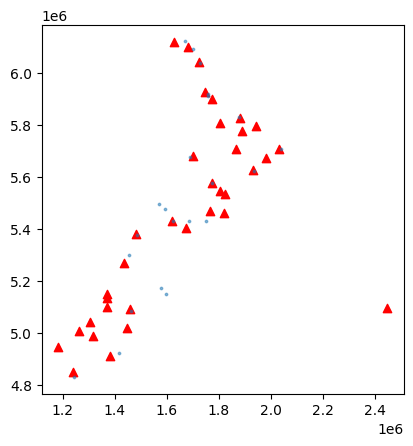

In [7]:
#Seleccionando solo los aeropuertos de tamaño mediano
MediumAirports=airports[airports.kind=='medium_airport'] 
MediumAirports.reset_index(drop=True, inplace=True)

#Plot
base=MediumAirports.plot(color='red',marker="^")
seaports_nz_2193.plot(ax=base,alpha=0.5,markersize=3)

In [8]:
#Viendo la información contenida en los seaports de Nueva Zelanda
seaports_nz_2193

portName Country Code   Latitude   Longitude  \
0      Collingwood  New Zealand -40.683333  172.666667   
1     New Plymouth  New Zealand -39.066667  174.033333   
2         Auckland  New Zealand -36.850000  174.766667   
3           Timaru  New Zealand -44.400000  171.250000   
4        Greymouth  New Zealand -42.433333  171.216667   
5     Bluff Harbor  New Zealand -46.600000  168.333333   
6             Opua  New Zealand -35.316667  174.116667   
7           Akaroa  New Zealand -43.800000  172.966667   
8        Whangaroa  New Zealand -35.050000  173.766667   
9         Tauranga  New Zealand -37.633333  176.166667   
10        Wanganui  New Zealand -39.950000  175.033333   
11        Tarakohe  New Zealand -40.850000  172.900000   
12          Napier  New Zealand -39.483333  176.916667   
13          Nelson  New Zealand -41.266667  173.266667   
14        Gisborne  New Zealand -38.666667  178.033333   
15  Manukau Harbor  New Zealand -36.933333  174.783333   
16  Port Lyttelton  New Zealand -43.600000  172.716667   
17          Picton  New Zealand -41.283333  174.016667   
18      Wellington  New Zealand -41.283333  174.783333   
19        Westport  New Zealand -41.750000  171.600000   
20    Otago Harbor  New Zealand -45.816667  170.633333   
21       Whangarei  New Zealand -35.800000  174.433333   

                           geometry  
0   POINT (1571832.419 5496341.598)  
1   POINT (1689395.096 5675317.197)  
2   POINT (1757506.391 5920310.843)  
3   POINT (1460640.867 5082209.191)  
4   POINT (1453312.701 5300568.930)  
5   POINT (1242596.742 4828698.133)  
6   POINT (1701505.738 6091266.986)  
7   POINT (1597318.596 5150339.789)  
8   POINT (1669917.766 6121143.451)  
9   POINT (1879439.982 5830148.254)  
10  POINT (1773697.693 5575812.724)  
11  POINT (1591570.809 5477889.333)  
12  POINT (1936882.262 5622257.414)  
13  POINT (1622336.480 5431605.400)  
14  POINT (2038007.120 5708175.007)  
15  POINT (1758819.573 5911037.732)  
16  POINT (1577131.968 5172513.724)  
17  POINT (1685136.642 5429291.123)  
18  POINT (1749340.105 5428255.839)  
19  POINT (1483601.278 5377033.346)  
20  POINT (1416140.622 4923597.900)  
21  POINT (1729512.592 6037286.372)

In [9]:
#Viendo la información de los aeropuertos medianos
MediumAirports

name            kind  latitude_deg  \
0   Queenstown International Airport  medium_airport    -45.021099   
1      Dunedin International Airport  medium_airport    -45.928101   
2                     Nelson Airport  medium_airport    -41.298302   
3           Rotorua Regional Airport  medium_airport    -38.109200   
4                Hawke's Bay Airport  medium_airport    -39.465801   
5     Hamilton International Airport  medium_airport    -37.866699   
6               Invercargill Airport  medium_airport    -46.412399   
7                     Wanaka Airport  medium_airport    -44.722954   
8           Palmerston North Airport  medium_airport    -40.320599   
9                   Tauranga Airport  medium_airport    -37.671902   
10                Woodbourne Airport  medium_airport    -41.518299   
11               Paraparaumu Airport  medium_airport    -40.904701   
12                Glentanner Airport  medium_airport    -43.906700   
13                      Hood Airport  medium_airport    -40.974634   
14                 Hokitika Airfield  medium_airport    -42.713600   
15              New Plymouth Airport  medium_airport    -39.008598   
16   Chatham Islands / Tuuta Airport  medium_airport    -43.811890   
17                   Ardmore Airport  medium_airport    -37.029701   
18                    Timaru Airport  medium_airport    -44.302799   
19                    Oamaru Airport  medium_airport    -44.970001   
20                     Taupo Airport  medium_airport    -38.739700   
21                 RNZAF Base Ohakea  medium_airport    -40.206001   
22                  Gisborne Airport  medium_airport    -38.663300   
23                 Whangarei Airport  medium_airport    -35.769253   
24                Mount Cook Airport  medium_airport    -43.764999   
25                    Pukaki Airport  medium_airport    -44.235001   
26                  Kerikeri Airport  medium_airport    -35.259148   
27                  Wanganui Airport  medium_airport    -39.962200   
28     RNZAF Base Auckland-Whenuapai  medium_airport    -36.787800   
29                  Westport Airport  medium_airport    -41.737111   
30                 Whakatane Airport  medium_airport    -37.920601   
31                 Manapouri Airport  medium_airport    -45.533100   
32                   Kaitaia Airport  medium_airport    -35.069837   
33               Alexandra Aerodrome  medium_airport    -45.210495   
34                    Wairoa Airport  medium_airport    -39.006901   

    longitude_deg  elevation_ft               region_name        municipality  \
0      168.738998        1171.0              Otago Region          Queenstown   
1      170.197998           4.0              Otago Region             Dunedin   
2      173.220993          17.0             Nelson Region              Nelson   
3      176.317001         935.0      Bay of Plenty Region             Rotorua   
4      176.869995           6.0        Hawke's Bay Region              Napier   
5      175.332001         172.0            Waikato Region            Hamilton   
6      168.313004           5.0          Southland Region        Invercargill   
7      169.248419        1142.0              Otago Region              Wanaka   
8      175.617004         151.0  Manawatu-Wanganui Region    Palmerston North   
9      176.195999          13.0      Bay of Plenty Region            Tauranga   
10     173.869995         109.0        Marlborough Region            Blenheim   
11     174.988998          22.0         Wellington Region                 NaN   
12     170.128006        1824.0         Canterbury Region  Glentanner Station   
13     175.634540         364.0         Wellington Region           Masterton   
14     170.985001         146.0         West Coast Region                 NaN   
15     174.179001          97.0           Taranaki Region        New Plymouth   
16    -176.465140          43.0         Wellington Region              Te One   
17     174.973007         111.0           Auckland Re

In [10]:
#Distancia entre Queenstown y Collingwood en km
MediumAirports.iloc[0].geometry.distance(seaports_nz_2193.iloc[0].geometry)/1000

578.9184311520917

In [11]:
#Intentando comprender cómo funciona formar una matriz
#Intento 1
seaports_nz_2193.geometry.apply\
(lambda g: MediumAirports.geometry.distance(g)/1000)
#Vemos que aparece sin orden y sin el nombre de los aeropuertos o los seaports, la información, se presenta de forma confusa

0            1           2            3            4   \
0    578.918431   615.956284   82.670294   424.801190   383.144182   
1    793.017255   824.348021  257.177245   225.586422   248.825286   
2   1038.974513  1077.458728  511.458381   195.833017   344.030529   
3    210.668671   188.890698  380.214964   817.078306   719.043152   
4    350.111591   396.769852  208.692790   646.749318   578.709330   
5    178.492609   162.094743  707.525424  1148.580502  1053.420260   
6   1170.149046  1223.397959  668.337162   367.000370   521.106710   
7    363.014551   322.088682  278.570968   691.873915   580.827604   
8   1186.749152  1244.601341  694.943909   409.055721   562.105278   
9   1028.516886  1045.533986  479.299666    54.482150   212.614367   
10   764.416565   771.996178  214.251201   232.689019   166.493219   
11   574.383723   604.948114   56.602477   423.019972   371.482023   
12   912.313241   902.325395  372.909631   161.325290     4.467124   
13   556.281666   573.883835    5.192617   437.374879   365.571054   
14  1044.926971  1032.589350  504.404972   162.419099   134.383375   
15  1031.451233  1069.230604  502.905451   188.222859   335.403488   
16   354.457875   326.543772  258.916866   680.921026   575.141603   
17   596.991266   600.807376   66.645404   403.882578   315.389376   
18   643.183086   634.701040  130.838384   376.233250   268.656936   
19   431.116080   477.676754  144.244178   570.705805   512.926800   
20   172.703656    36.001190  543.577625   976.424086   870.738054   
21  1131.483992  1179.295308  619.214292   306.333326   460.304772   

             5            6            7           8            9   ...  \
0    388.033566   727.129475   528.853373  253.240713   452.394542  ...   
1    174.870680   940.317073   742.813643  194.488884   244.316517  ...   
2    123.453681  1189.440142   989.900297  392.335274   156.223226  ...   
3    801.960254   320.855948   163.046573  578.257475   854.600495  ...   
4    616.157880   499.097256   300.023973  436.332900   677.878192  ...   
5   1127.991400    20.936950   220.675155  912.512821  1184.423292  ...   
6    303.117250  1324.872638  1123.389089  570.833678   320.966499  ...   
7    688.196787   467.285209   314.079901  444.244182   732.936517  ...   
8    342.546087  1342.464745  1140.819347  607.216529   363.550615  ...   
9     78.011288  1170.859869   977.342507  302.217839     5.005315  ...   
10   232.730933   901.472581   712.535308   64.563355   272.373892  ...   
11   391.833365   720.195526   523.667569  237.355942   453.110218  ...   
12   226.433361  1040.748941   860.133281  144.976165   210.822716  ...   
13   417.003940   696.592933   504.613648  224.415248   471.951016  ...   
14   252.751482  1172.410757   992.746635  277.603635   195.462481  ...   
15   114.416151  1181.674566   982.280989  382.972730   149.711578  ...   
16   673.653128   467.080729   304.152215  436.292032   720.853379  ...   
17   395.749532   731.124506   544.883601  172.222350   442.619817  ...   
18   382.248655   771.135434   591.015926  127.983992   419.037964  ...   
19   536.418551   581.193359   381.562329  373.085903   600.001345  ...   
20   964.712865   191.296035   163.101976  732.687356  1015.306812  ...   
21   242.941925  1284.826553  1083.807313  512.395635   260.675746  ...   

             25           26          27           28          29  \
0    446.636868   611.695026  215.765800   464.730990  148.328779   
1    659.864396   422.565531  130.963308   258.265108  362.243040   
2    909.118487   192.495223  346.181003    14.009886  607.966797   
3     92.152272  1039.699808  582.979539   891.910939  296.983786   
4    219.102812   829.714828  420.945673   691.585359   82.926081   
5    297.840704  1343.404098  915.129527  1208.328629  599.538276   
6   1047.188320    19.562229  521.707966   169.626929  745.911395   
7    233.416533   951.369047  459.062518   791.079021  255.664621   
8   1066.251620    26.767225  556.294260   207.916033  

In [12]:
# Intento 2
seaports_nz_2193.set_index('portName').geometry.apply\
(lambda g: MediumAirports.set_index('name').geometry.distance(g)/1000)
#Se observan los nombres de los aeropuertos y los puertos. Sin emabrgo, no estpa ordenando alfabéticamente 

name            Queenstown International Airport  \
portName                                           
Collingwood                           578.918431   
New Plymouth                          793.017255   
Auckland                             1038.974513   
Timaru                                210.668671   
Greymouth                             350.111591   
Bluff Harbor                          178.492609   
Opua                                 1170.149046   
Akaroa                                363.014551   
Whangaroa                            1186.749152   
Tauranga                             1028.516886   
Wanganui                              764.416565   
Tarakohe                              574.383723   
Napier                                912.313241   
Nelson                                556.281666   
Gisborne                             1044.926971   
Manukau Harbor                       1031.451233   
Port Lyttelton                        354.457875   
Picton                                596.991266   
Wellington                            643.183086   
Westport                              431.116080   
Otago Harbor                          172.703656   
Whangarei                            1131.483992   

name            Dunedin International Airport  Nelson Airport  \
portName                                                        
Collingwood                        615.956284       82.670294   
New Plymouth                       824.348021      257.177245   
Auckland                          1077.458728      511.458381   
Timaru                             188.890698      380.214964   
Greymouth                          396.769852      208.692790   
Bluff Harbor                       162.094743      707.525424   
Opua                              1223.397959      668.337162   
Akaroa                             322.088682      278.570968   
Whangaroa                         1244.601341      694.943909   
Tauranga                          1045.533986      479.299666   
Wanganui                           771.996178      214.251201   
Tarakohe                           604.948114       56.602477   
Napier                             902.325395      372.909631   
Nelson                             573.883835        5.192617   
Gisborne                          1032.589350      504.404972   
Manukau Harbor                    1069.230604      502.905451   
Port Lyttelton                     326.543772      258.916866   
Picton                             600.807376       66.645404   
Wellington                         634.701040      130.838384   
Westport                           477.676754      144.244178   
Otago Harbor                        36.001190      543.577625   
Whangarei                         1179.295308      619.214292   

name            Rotorua Regional Airport  Hawke's Bay Airport  \
portName                                                        
Collingwood                   424.801190           383.144182   
New Plymouth                  225.586422           248.825286   
Auckland                      195.833017           344.030529   
Timaru                        817.078306           719.043152   
Greymouth                     646.749318           578.709330   
Bluff Harbor                 1148.580502          1053.420260   
Opua                          367.000370           521.106710   
Akaroa                        691.873915           580.827604   
Whangaroa                     409.055721           562.105278   
Tauranga                       54.482150           212.614367   
Wanganui                      232.689019           166.493219   
Tarakohe                      423.019972           371.482023   
Napier                        161.325290             4.467124   
Nelson                        437.374879           365.571054   
Gisborne                      162.419099           134.383375   
Manukau Harbor                188.222859           335.403488   
Port Lyttelton      

In [13]:
#Intento 3
seaports_nz_2193.set_index('portName').geometry.apply\
(lambda g: MediumAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
#Hay orden en los datos

name            Alexandra Aerodrome  Ardmore Airport  \
portName                                               
Akaroa                   326.003033       770.555064   
Auckland                1032.650503        27.119882   
Bluff Harbor             174.323734      1196.533294   
Collingwood              570.184276       452.136545   
Gisborne                1020.982937       325.140002   
Greymouth                342.467573       680.538121   
Manukau Harbor          1024.847421        19.987814   
Napier                   888.771613       321.239615   
Nelson                   540.256808       492.810215   
New Plymouth             783.306777       240.625621   
Opua                    1169.698551       205.066178   
Otago Harbor             119.474346      1040.441751   
Picton                   576.512499       479.314953   
Port Lyttelton           320.956333       754.056578   
Tarakohe                 563.196296       460.450892   
Tauranga                1014.403497       125.244867   
Timaru                   173.827297       876.318212   
Wanganui                 746.167485       324.204917   
Wellington               618.948878       472.481134   
Westport                 424.663289       598.921880   
Whangarei               1128.871200       144.769294   
Whangaroa               1188.123522       245.040163   

name            Chatham Islands / Tuuta Airport  \
portName                                          
Akaroa                               851.965421   
Auckland                            1075.904158   
Bluff Harbor                        1233.901213   
Collingwood                          963.328453   
Gisborne                             737.514284   
Greymouth                           1015.234952   
Manukau Harbor                      1067.958185   
Napier                               734.128212   
Nelson                               891.237352   
New Plymouth                         954.837187   
Opua                                1244.777788   
Otago Harbor                        1045.437223   
Picton                               832.500550   
Port Lyttelton                       873.803241   
Tarakohe                             937.733751   
Tauranga                             929.215447   
Timaru                               986.908746   
Wanganui                             827.872210   
Wellington                           773.691687   
Westport                            1004.348472   
Whangarei                           1184.821763   
Whangaroa                           1287.646239   

name            Dunedin International Airport  Gisborne Airport  \
portName                                                          
Akaroa                             322.088682        708.443864   
Auckland                          1077.458728        347.481818   
Bluff Harbor                       162.094743       1183.076454   
Collingwood                        615.956284        507.949445   
Gisborne                          1032.589350          4.839942   
Greymouth                          396.769852        709.184802   
Manukau Harbor                    1069.230604        340.858827   
Napier                             902.325395        129.501819   
Nelson                             573.883835        495.641394   
New Plymouth                       824.348021        345.442033   
Opua                              1223.397959        506.259431   
Otago Harbor                        36.001190        998.667137   
Picton                             600.807376        446.415624   
Port Lyttelton                     326.543772        704.005070   
Tarakohe                           604.948114        498.367533   
Tauranga                          1045.533986        195.875855   
Timaru                             188.890698        848.803034   
Wanganui                           771.996178        291.608112   
Wellington                         634.701040        399.116381   
Westport               

In [14]:
#Creando la matriz con el intento 3
distanceMatrixKM_sea_air= seaports_nz_2193.set_index('portName').geometry.apply\
                          (lambda g: MediumAirports.set_index('name').geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)

In [15]:
# La distancia media desde un seaport a un aeropuerto de tamaño "medio"
distanceMatrixKM_sea_air.mean(axis=1).sort_values(ascending=True)

portName
Wanganui          411.884294
Picton            414.054076
Nelson            417.324098
Wellington        419.175630
Tarakohe          422.877877
Collingwood       428.963495
New Plymouth      435.537991
Westport          452.812421
Napier            469.877884
Greymouth         470.505601
Port Lyttelton    491.093789
Akaroa            501.930567
Tauranga          514.034883
Timaru            533.833943
Manukau Harbor    543.101746
Gisborne          548.233224
Auckland          549.285945
Whangarei         636.212179
Otago Harbor      641.792976
Opua              681.289302
Whangaroa         709.212866
Bluff Harbor      774.471115
dtype: float64

In [16]:
#Creando un DF, a partir de las estádistica de la matriz
SomeStats=pd.DataFrame()
SomeStats['mean']=distanceMatrixKM_sea_air.mean(axis=1)
SomeStats['min']=distanceMatrixKM_sea_air.min(axis=1)
SomeStats['max']=distanceMatrixKM_sea_air.max(axis=1)
SomeStats.head()

mean         min          max
portName                                         
Akaroa        501.930567  150.285924   969.264324
Auckland      549.285945   14.009886  1189.440142
Bluff Harbor  774.471115   20.936950  1346.276072
Collingwood   428.963495   82.670294   963.328453
Gisborne      548.233224    4.839942  1172.410757

In [17]:
# El aeropuerto más lejano por cada seaport
distanceMatrixKM_sea_air.idxmax(axis="columns")

portName
Akaroa                            Kaitaia Airport
Auckland                     Invercargill Airport
Bluff Harbor                      Kaitaia Airport
Collingwood       Chatham Islands / Tuuta Airport
Gisborne                     Invercargill Airport
Greymouth         Chatham Islands / Tuuta Airport
Manukau Harbor               Invercargill Airport
Napier                       Invercargill Airport
Nelson            Chatham Islands / Tuuta Airport
New Plymouth      Chatham Islands / Tuuta Airport
Opua                         Invercargill Airport
Otago Harbor                      Kaitaia Airport
Picton            Chatham Islands / Tuuta Airport
Port Lyttelton                    Kaitaia Airport
Tarakohe          Chatham Islands / Tuuta Airport
Tauranga                     Invercargill Airport
Timaru                            Kaitaia Airport
Wanganui                     Invercargill Airport
Wellington        Chatham Islands / Tuuta Airport
Westport          Chatham Islands / Tuuta

In [18]:
# El seaport más lejano por cada aeropuerto
distanceMatrixKM_sea_air.idxmax(axis="rows")

name
Alexandra Aerodrome                    Whangaroa
Ardmore Airport                     Bluff Harbor
Chatham Islands / Tuuta Airport        Whangaroa
Dunedin International Airport          Whangaroa
Gisborne Airport                    Bluff Harbor
Glentanner Airport                     Whangaroa
Hamilton International Airport      Bluff Harbor
Hawke's Bay Airport                 Bluff Harbor
Hokitika Airfield                      Whangaroa
Hood Airport                        Bluff Harbor
Invercargill Airport                   Whangaroa
Kaitaia Airport                     Bluff Harbor
Kerikeri Airport                    Bluff Harbor
Manapouri Airport                      Whangaroa
Mount Cook Airport                     Whangaroa
Nelson Airport                      Bluff Harbor
New Plymouth Airport                Bluff Harbor
Oamaru Airport                         Whangaroa
Palmerston North Airport            Bluff Harbor
Paraparaumu Airport                 Bluff Harbor
Pukaki Airport 

In [19]:
#Aeropuerto más cercano por cada seaport
distanceMatrixKM_sea_air.idxmin(axis="columns")

portName
Akaroa                           Timaru Airport
Auckland          RNZAF Base Auckland-Whenuapai
Bluff Harbor               Invercargill Airport
Collingwood                      Nelson Airport
Gisborne                       Gisborne Airport
Greymouth                     Hokitika Airfield
Manukau Harbor                  Ardmore Airport
Napier                      Hawke's Bay Airport
Nelson                           Nelson Airport
New Plymouth               New Plymouth Airport
Opua                           Kerikeri Airport
Otago Harbor      Dunedin International Airport
Picton                       Woodbourne Airport
Port Lyttelton                   Timaru Airport
Tarakohe                         Nelson Airport
Tauranga                       Tauranga Airport
Timaru                           Timaru Airport
Wanganui                       Wanganui Airport
Wellington                  Paraparaumu Airport
Westport                       Westport Airport
Whangarei                     W

In [20]:
# El seapuerto más cercano por cada aeropuerto
distanceMatrixKM_sea_air.idxmin(axis="rows")

name
Alexandra Aerodrome                   Otago Harbor
Ardmore Airport                     Manukau Harbor
Chatham Islands / Tuuta Airport             Napier
Dunedin International Airport         Otago Harbor
Gisborne Airport                          Gisborne
Glentanner Airport                          Timaru
Hamilton International Airport            Tauranga
Hawke's Bay Airport                         Napier
Hokitika Airfield                        Greymouth
Hood Airport                            Wellington
Invercargill Airport                  Bluff Harbor
Kaitaia Airport                          Whangaroa
Kerikeri Airport                              Opua
Manapouri Airport                     Bluff Harbor
Mount Cook Airport                          Timaru
Nelson Airport                              Nelson
New Plymouth Airport                  New Plymouth
Oamaru Airport                              Timaru
Palmerston North Airport                  Wanganui
Paraparaumu Airport       

In [21]:
fila_elegida=distanceMatrixKM_sea_air.iloc[[1]]
fila_elegida

name      Alexandra Aerodrome  Ardmore Airport  \
portName                                         
Auckland          1032.650503        27.119882   

name      Chatham Islands / Tuuta Airport  Dunedin International Airport  \
portName                                                                   
Auckland                      1075.904158                    1077.458728   

name      Gisborne Airport  Glentanner Airport  \
portName                                         
Auckland        347.481818           876.45648   

name      Hamilton International Airport  Hawke's Bay Airport  \
portName                                                        
Auckland                      123.453681           344.030529   

name      Hokitika Airfield  Hood Airport  ...  Taupo Airport  \
portName                                   ...                  
Auckland         726.768103    464.051623  ...     239.729056   

name      Tauranga Airport  Timaru Airport  Wairoa Airport  Wanaka Airport  \
portName                                                                     
Auckland        156.223226      879.749478      333.616879      989.900297   

name      Wanganui Airport  Westport Airport  Whakatane Airport  \
portName                                                          
Auckland        346.181003        607.966797         224.319889   

name      Whangarei Airport  Woodbourne Airport  
portName                                         
Auckland          125.24628          523.899264  

[1 rows x 35 columns]

In [22]:
indice_minimo = fila_elegida.idxmin(axis="columns")

indice_minimo

portName
Auckland    RNZAF Base Auckland-Whenuapai
dtype: object

<Axes: >

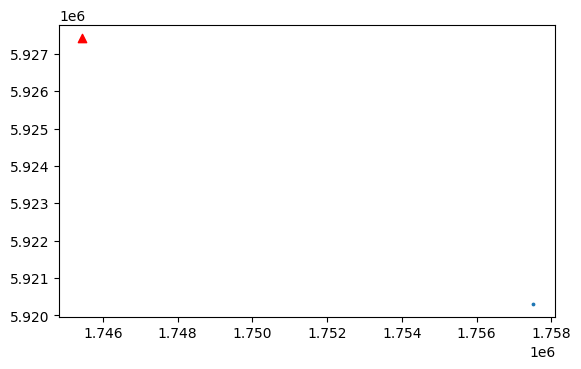

In [23]:
base=MediumAirports[MediumAirports.name=='RNZAF Base Auckland-Whenuapai'].plot(color='red',marker="^")
seaports_nz_2193[seaports_nz_2193.portName=='Auckland'].plot(ax=base,alpha=1,markersize=3)

In [24]:
#EJERCICIO 2
#Descargando railroads de Nueva zelanda, para poder calcular la distancia entre líneas y puntos
#Abriendo los shapefile de las vías férreas 
railroad=gpd.read_file(os.path.join("maps","New Zeland_Railroads","New Zeland_Railroads.shp"))

In [25]:
#¿Qué tenemos en railroad?
railroad

f_code  exs  fco  loc  soc  \
0    AN010   28    3    0  NZL   
1    AN010   28    3    0  NZL   
2    AN010   28    3    0  NZL   
3    AN010   28    3    0  NZL   
4    AN010   28    3    0  NZL   
..     ...  ...  ...  ...  ...   
147  AN010   28    2    0  NZL   
148  AN010   28    3    0  NZL   
149  AN010   28    3    0  NZL   
150  AN010   28    3    0  NZL   
151  AN010   28    3    0  NZL   

                                              geometry  
0    LINESTRING (174.53098 -36.89878, 174.53213 -36...  
1    LINESTRING (175.18607 -37.54066, 175.18526 -37...  
2    LINESTRING (171.68327 -43.91570, 171.68401 -43...  
3    LINESTRING (176.89090 -39.49532, 176.89083 -39...  
4    LINESTRING (174.89642 -41.03294, 174.89695 -41...  
..                                                 ...  
147  LINESTRING (171.56359 -42.83246, 171.56332 -42...  
148  LINESTRING (168.33036 -46.59095, 168.32716 -46...  
149  LINESTRING (168.79676 -46.28225, 168.79800 -46...  
150  LINESTRING (176.16884 -37.66855, 176.16866 -37...  
151  LINESTRING (172.69631 -43.56909, 172.69829 -43...  

[152 rows x 6 columns]

In [26]:
#Borrando todas las columnas excepto  "geometry" y "fco"
byeColumns=['f_code', 'exs', 'loc','soc']

#El resultado
railroad.drop(columns=byeColumns,inplace=True)
#Ahora
railroad

fco                                           geometry
0      3  LINESTRING (174.53098 -36.89878, 174.53213 -36...
1      3  LINESTRING (175.18607 -37.54066, 175.18526 -37...
2      3  LINESTRING (171.68327 -43.91570, 171.68401 -43...
3      3  LINESTRING (176.89090 -39.49532, 176.89083 -39...
4      3  LINESTRING (174.89642 -41.03294, 174.89695 -41...
..   ...                                                ...
147    2  LINESTRING (171.56359 -42.83246, 171.56332 -42...
148    3  LINESTRING (168.33036 -46.59095, 168.32716 -46...
149    3  LINESTRING (168.79676 -46.28225, 168.79800 -46...
150    3  LINESTRING (176.16884 -37.66855, 176.16866 -37...
151    3  LINESTRING (172.69631 -43.56909, 172.69829 -43...

[152 rows x 2 columns]

In [27]:
#Cambiando el nombre de fco por "SYSTEM"
railroad.rename(columns={'fco': 'SYSTEM'}, inplace=True)
railroad

SYSTEM                                           geometry
0         3  LINESTRING (174.53098 -36.89878, 174.53213 -36...
1         3  LINESTRING (175.18607 -37.54066, 175.18526 -37...
2         3  LINESTRING (171.68327 -43.91570, 171.68401 -43...
3         3  LINESTRING (176.89090 -39.49532, 176.89083 -39...
4         3  LINESTRING (174.89642 -41.03294, 174.89695 -41...
..      ...                                                ...
147       2  LINESTRING (171.56359 -42.83246, 171.56332 -42...
148       3  LINESTRING (168.33036 -46.59095, 168.32716 -46...
149       3  LINESTRING (168.79676 -46.28225, 168.79800 -46...
150       3  LINESTRING (176.16884 -37.66855, 176.16866 -37...
151       3  LINESTRING (172.69631 -43.56909, 172.69829 -43...

[152 rows x 2 columns]

In [28]:
#Seleccionando una fila
railroad_f1 = railroad.head(1)
railroad_f1

SYSTEM                                           geometry
0       3  LINESTRING (174.53098 -36.89878, 174.53213 -36...

In [29]:
#¿Qué tipo es?
railroad_f1.type

0    LineString
dtype: object

In [30]:
#Analizando el crs de la fila seleccionada
railroad_f1.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [31]:
#Agregando un CRS genérico
railroad_f1.crs="EPSG:4326"

In [32]:
#Cambiando el CRS a 2193
railroad_f1.to_crs(2193).crs.axis_info

[Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [33]:
#Analizando el CRS de la fila
railroad_f1_2193=railroad_f1.to_crs(2193)
railroad_f1_2193.crs

<Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - North Island, South Island, Stewart Island - onshore.
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [34]:
railroad_f1_2193.iloc[0].geometry.distance(MediumAirports.geometry)

0     1.024642e+06
1     1.065539e+06
2     5.012227e+05
3     2.066507e+05
4     3.507798e+05
5     1.285129e+05
6     1.175831e+06
7     9.758631e+05
8     3.914427e+05
9     1.697921e+05
10    5.158853e+05
11    4.464306e+05
12    8.627468e+05
13    4.624735e+05
14    7.130748e+05
15    2.361618e+05
16    1.085236e+06
17    4.070979e+04
18    8.680171e+05
19    9.416793e+05
20    2.456566e+05
21    3.746280e+05
22    3.606259e+05
23    1.255614e+05
24    8.485799e+05
25    8.957142e+05
26    1.896335e+05
27    3.427419e+05
28    1.356189e+04
29    5.941287e+05
30    2.385463e+05
31    1.118314e+06
32    2.313276e+05
33    1.019188e+06
34    3.439471e+05
Name: geometry, dtype: float64

In [35]:
#Siguiendo lo mismo que el paso anterior
railroad.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
railroad.crs="EPSG:4326"

In [37]:
railroad.to_crs(2193).crs.axis_info

[Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [38]:
railroad_2193=railroad.to_crs(2193)
railroad_2193.crs

<Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - North Island, South Island, Stewart Island - onshore.
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [39]:
#Como no hay nombre en railroad, solo nos quedamos con los números y el nombre de los aeropuertos
distanceMatrixKM_rail_air= railroad_2193.geometry.apply\
(lambda g: MediumAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
distanceMatrixKM_rail_air

name  Alexandra Aerodrome  Ardmore Airport  Chatham Islands / Tuuta Airport  \
0             1019.187595        40.709792                      1085.236449   
1              979.564555        58.246816                       993.823680   
2              233.336135       813.239682                       951.490911   
3              886.298414       320.191313                       734.179565   
4              645.797521       441.308479                       775.675765   
..                    ...              ...                              ...   
147            317.372123       706.325306                       978.376289   
148            173.452508      1195.693127                      1233.968421   
149            100.283133      1092.183762                      1102.315089   
150           1010.880541       127.485797                       926.020205   
151            321.604828       751.070051                       875.402785   

name  Dunedin International Airport  Gisborne Airport  Glentanner Airport  \
0                       1065.538659        360.625889          862.746754   
1                       1018.548210        274.961224          824.871051   
2                        252.460970        784.718324          124.925334   
3                        899.954833        128.878343          745.795591   
4                        663.094963        368.381090          505.383809   
..                              ...               ...                 ...   
147                      360.758466        712.109992          166.672649   
148                      161.848212       1182.531149          330.113906   
149                       28.530058       1058.575907          246.503692   
150                     1041.818799        193.385200          859.198202   
151                      328.329771        702.220219          210.229706   

name  Hamilton International Airport  Hawke's Bay Airport  Hokitika Airfield  \
0                         128.512868           350.779756         713.074843   
1                          38.254178           259.312560         675.826867   
2                         737.892880           654.741453         145.042765   
3                         225.279276             2.949758         611.159959   
4                         350.114217           237.516592         374.372314   
..                               ...                  ...                ...   
147                       636.853923           581.047172          48.959499   
148                      1127.215046          1052.859960         479.632349   
149                      1018.530773           930.114094         387.427985   
150                        76.711328           208.641993         712.481718   
151                       670.847211           573.237970         168.517653   

name  Hood Airport  ...  Taupo Airport  Tauranga Airport  Timaru Airport  \
0       462.473484  ...     245.656608        169.792125      868.017101   
1       383.001365  ...     154.543821         90.385042      820.729277   
2       459.278603  ...     681.544599        789.963597       56.514460   
3       196.098055  ...     108.414296        210.051350      711.059166   
4        59.121689  ...     270.142922        385.798963      471.476977   
..             ...  ...            ...               ...             ...   
147     395.455069  ...     592.774214        694.723799      165.601752   
148     856.648518  ...    1078.056789       1183.699576      340.605181   
149     732.654115  ...     961.792598       1070.912789      225.347102   
150     369.804945  ...     118.943484          2.426549      845.272603   
151     376.181887  ...     606.642689        718.276826      143.486681   

name  Wairoa Airport  Wanaka Airport  Wanganui Airport  Westport Airport  \
0         343.947060      975.863091        342.741941        594.128705   
1         253.576801      939.276913        268.854955        558.472390   
2         723.612327    

In [40]:
#Analizando las distancias obtenidas con la fila 1
distanceMatrixKM_rail_air.iloc[0].sort_values()

name
RNZAF Base Auckland-Whenuapai         13.561892
Ardmore Airport                       40.709792
Whangarei Airport                    125.561429
Hamilton International Airport       128.512868
Tauranga Airport                     169.792125
Kerikeri Airport                     189.633469
Rotorua Regional Airport             206.650716
Kaitaia Airport                      231.327646
New Plymouth Airport                 236.161847
Whakatane Airport                    238.546320
Taupo Airport                        245.656608
Wanganui Airport                     342.741941
Wairoa Airport                       343.947060
Hawke's Bay Airport                  350.779756
Gisborne Airport                     360.625889
RNZAF Base Ohakea                    374.628017
Palmerston North Airport             391.442666
Paraparaumu Airport                  446.430640
Hood Airport                         462.473484
Nelson Airport                       501.222702
Woodbourne Airport                 

In [41]:
base=railroad_f1_2193.explore()
MediumAirports.explore(m=base,color='red',marker_kwds=dict(radius=10))


In [42]:
#Analizando si hay datos inválidos
railroad_2193[~railroad_2193.SYSTEM.isna()]

SYSTEM                                           geometry
0         3  LINESTRING (1736405.090 5915262.277, 1736510.1...
1         3  LINESTRING (1793134.652 5842902.135, 1793058.1...
2         3  LINESTRING (1494282.619 5136646.931, 1494343.2...
3         3  LINESTRING (1934607.390 5621023.108, 1934608.0...
4         3  LINESTRING (1759416.388 5455853.718, 1759462.8...
..      ...                                                ...
147       2  LINESTRING (1482602.125 5256789.137, 1482576.4...
148       3  LINESTRING (1242309.383 4829689.722, 1242050.2...
149       3  LINESTRING (1276205.316 4866000.000, 1276282.4...
150       3  LINESTRING (1879499.258 5826233.218, 1879480.4...
151       3  LINESTRING (1575476.727 5175941.043, 1575636.7...

[152 rows x 2 columns]

In [43]:
#Disolviendo por sistemas
systems=railroad_2193.dissolve(by='SYSTEM')
systems

geometry
SYSTEM                                                   
2       MULTILINESTRING ((1379054.334 4904296.686, 137...
3       MULTILINESTRING ((1736405.090 5915262.277, 173...

In [44]:
#Ordenando 
systems['NAME']=systems.index
systems.reset_index(drop=True,inplace=True)
systems

geometry  NAME
0  MULTILINESTRING ((1379054.334 4904296.686, 137...     2
1  MULTILINESTRING ((1736405.090 5915262.277, 173...     3

In [45]:
#Usando los sistemas y los aeropuertos medios 
distanceMatrixKM_sys_air=systems.set_index('NAME').geometry.apply\
(lambda g: MediumAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sys_air

name  Alexandra Aerodrome  Ardmore Airport  Chatham Islands / Tuuta Airport  \
NAME                                                                          
2              104.718669         4.195125                       761.354626   
3               53.051342        15.959563                       713.345914   

name  Dunedin International Airport  Gisborne Airport  Glentanner Airport  \
NAME                                                                        
2                          5.788052        257.148776          166.672649   
3                          1.917172          0.192987           97.069264   

name  Hamilton International Airport  Hawke's Bay Airport  Hokitika Airfield  \
NAME                                                                           
2                          10.782294           232.061820          48.959499   
3                           4.159874             0.415113           1.060646   

name  Hood Airport  ...  Taupo Airport  Tauranga Airport  Timaru Airport  \
NAME                ...                                                    
2        53.524093  ...     127.934902         83.330798      132.971193   
3         2.392810  ...      52.774305          1.218173        2.907726   

name  Wairoa Airport  Wanaka Airport  Wanganui Airport  Westport Airport  \
NAME                                                                       
2         231.326929      155.677554        112.103432        121.131645   
3           0.743732       79.511452          1.552184          1.755935   

name  Whakatane Airport  Whangarei Airport  Woodbourne Airport  
NAME                                                            
2            146.202882         123.128964           80.464922  
3              8.938108           2.223877            7.577755  

[2 rows x 35 columns]

In [46]:
#Analizando el CRS de systems
systems.crs

<Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - North Island, South Island, Stewart Island - onshore.
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [47]:
mins=distanceMatrixKM_sys_air.idxmin(axis="columns")
#Calcular la diatancia minima entre un sistema de vías férreas y los aeropuertos
mins

NAME
2     Ardmore Airport
3    Gisborne Airport
dtype: object

In [48]:
base=systems.explore(color='orange')
# El más cercano al sistema
MediumAirports[MediumAirports.name.isin(mins)].explore(m=base,color='green',marker_kwds=dict(radius=10))
# Los no cercanos 
MediumAirports[~MediumAirports.name.isin(mins)].explore(m=base,color='pink',marker_kwds=dict(radius=5))

In [49]:
fila_elegida2=distanceMatrixKM_rail_air.iloc[[1]]
fila_elegida2

name  Alexandra Aerodrome  Ardmore Airport  Chatham Islands / Tuuta Airport  \
1              979.564555        58.246816                        993.82368   

name  Dunedin International Airport  Gisborne Airport  Glentanner Airport  \
1                        1018.54821        274.961224          824.871051   

name  Hamilton International Airport  Hawke's Bay Airport  Hokitika Airfield  \
1                          38.254178            259.31256         675.826867   

name  Hood Airport  ...  Taupo Airport  Tauranga Airport  Timaru Airport  \
1       383.001365  ...     154.543821         90.385042      820.729277   

name  Wairoa Airport  Wanaka Airport  Wanganui Airport  Westport Airport  \
1         253.576801      939.276913        268.854955         558.47239   

name  Whakatane Airport  Whangarei Airport  Woodbourne Airport  
1            158.129278         208.239871           455.36178  

[1 rows x 35 columns]

In [50]:
indice_minimo2 = fila_elegida2.idxmin(axis="columns")
indice_minimo2

1    Hamilton International Airport
dtype: object

In [51]:
indice_max2 = fila_elegida2.idxmax(axis="columns")
indice_max2

1    Invercargill Airport
dtype: object

In [52]:
base = MediumAirports[MediumAirports.name == 'Hamilton International Airport'].explore(color='red')
railroad_2193.iloc[[1]].explore(m=base, color='blue')
MediumAirports[MediumAirports.name == 'Invercargill Airport'].explore(m=base, color='green')

<Axes: >

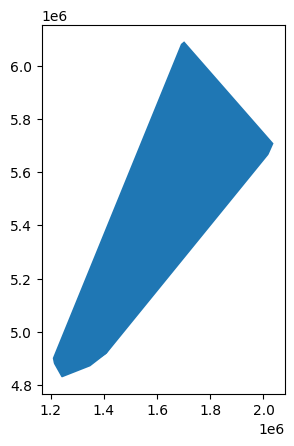

In [53]:
#EJERCICIO 3
#Polígono que usaremos
systems.convex_hull.plot()

In [54]:
systems.crs

<Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - North Island, South Island, Stewart Island - onshore.
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [55]:
#Convertir en polígono en GDF
systems_hulls=systems.convex_hull.to_frame()
systems_hulls['system']=[2, 3]
systems_hulls.rename(columns={0:'geometry'},inplace=True)
systems_hulls=systems_hulls.set_geometry('geometry')
systems_hulls.crs="EPSG:2193"
systems_hulls

geometry  system
0  POLYGON ((1364716.897 4888019.889, 1482534.740...       2
1  POLYGON ((1243699.072 4828758.881, 1242478.720...       3

In [56]:
#Analizando su CRS
systems_hulls.crs

<Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - North Island, South Island, Stewart Island - onshore.
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [57]:
#Creando la matriz
distanceMatrixKM_sysHull_air=systems_hulls.set_index('system').geometry.apply\
(lambda g: MediumAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sysHull_air

name    Alexandra Aerodrome  Ardmore Airport  Chatham Islands / Tuuta Airport  \
system                                                                          
2                 77.490909         2.985781                       761.354626   
3                  0.000000         0.000000                       692.670022   

name    Dunedin International Airport  Gisborne Airport  Glentanner Airport  \
system                                                                        
2                                 0.0        241.439071           70.472094   
3                                 0.0          0.000000            0.000000   

name    Hamilton International Airport  Hawke's Bay Airport  \
system                                                        
2                             6.596243           147.890788   
3                             0.000000             0.000000   

name    Hokitika Airfield  Hood Airport  ...  Taupo Airport  Tauranga Airport  \
system                                   ...                                    
2               48.848883     49.372207  ...      76.853685         83.330798   
3                0.000000      0.000000  ...       0.000000          0.000000   

name    Timaru Airport  Wairoa Airport  Wanaka Airport  Wanganui Airport  \
system                                                                     
2                  0.0      192.737633      105.388226               0.0   
3                  0.0        0.000000        0.000000               0.0   

name    Westport Airport  Whakatane Airport  Whangarei Airport  \
system                                                           
2              44.660546         145.950961         123.128964   
3               0.000000           0.000000           0.000000   

name    Woodbourne Airport  
system                      
2                      0.0  
3                      0.0  

[2 rows x 35 columns]

In [58]:
mins=distanceMatrixKM_sysHull_air.idxmin(axis="columns")
mins

system
2    Dunedin International Airport
3              Alexandra Aerodrome
dtype: object

In [59]:
maxs=distanceMatrixKM_sysHull_air.idxmax(axis="columns")
maxs

system
2    Chatham Islands / Tuuta Airport
3    Chatham Islands / Tuuta Airport
dtype: object

In [60]:
# plotting
base=systems_hulls.explore(color='gray')
MediumAirports[MediumAirports.name.isin(mins)].explore(m=base,color='green',marker_kwds=dict(radius=10))
MediumAirports[~MediumAirports.name.isin(mins)].explore(m=base,color='orange',marker_kwds=dict(radius=5))

In [61]:
# plotting
base=systems_hulls.iloc[[0]].explore(color='gray')
MediumAirports[MediumAirports.name=='Dunedin International Airport'].explore(m=base,color='green',marker_kwds=dict(radius=10))
MediumAirports[MediumAirports.name=='Chatham Islands / Tuuta Airport'].explore(m=base,color='blue',marker_kwds=dict(radius=5))

In [62]:
#EJERCICIO 4

In [63]:
#Tenemos 
distanceMatrixKM_rail_air

name  Alexandra Aerodrome  Ardmore Airport  Chatham Islands / Tuuta Airport  \
0             1019.187595        40.709792                      1085.236449   
1              979.564555        58.246816                       993.823680   
2              233.336135       813.239682                       951.490911   
3              886.298414       320.191313                       734.179565   
4              645.797521       441.308479                       775.675765   
..                    ...              ...                              ...   
147            317.372123       706.325306                       978.376289   
148            173.452508      1195.693127                      1233.968421   
149            100.283133      1092.183762                      1102.315089   
150           1010.880541       127.485797                       926.020205   
151            321.604828       751.070051                       875.402785   

name  Dunedin International Airport  Gisborne Airport  Glentanner Airport  \
0                       1065.538659        360.625889          862.746754   
1                       1018.548210        274.961224          824.871051   
2                        252.460970        784.718324          124.925334   
3                        899.954833        128.878343          745.795591   
4                        663.094963        368.381090          505.383809   
..                              ...               ...                 ...   
147                      360.758466        712.109992          166.672649   
148                      161.848212       1182.531149          330.113906   
149                       28.530058       1058.575907          246.503692   
150                     1041.818799        193.385200          859.198202   
151                      328.329771        702.220219          210.229706   

name  Hamilton International Airport  Hawke's Bay Airport  Hokitika Airfield  \
0                         128.512868           350.779756         713.074843   
1                          38.254178           259.312560         675.826867   
2                         737.892880           654.741453         145.042765   
3                         225.279276             2.949758         611.159959   
4                         350.114217           237.516592         374.372314   
..                               ...                  ...                ...   
147                       636.853923           581.047172          48.959499   
148                      1127.215046          1052.859960         479.632349   
149                      1018.530773           930.114094         387.427985   
150                        76.711328           208.641993         712.481718   
151                       670.847211           573.237970         168.517653   

name  Hood Airport  ...  Taupo Airport  Tauranga Airport  Timaru Airport  \
0       462.473484  ...     245.656608        169.792125      868.017101   
1       383.001365  ...     154.543821         90.385042      820.729277   
2       459.278603  ...     681.544599        789.963597       56.514460   
3       196.098055  ...     108.414296        210.051350      711.059166   
4        59.121689  ...     270.142922        385.798963      471.476977   
..             ...  ...            ...               ...             ...   
147     395.455069  ...     592.774214        694.723799      165.601752   
148     856.648518  ...    1078.056789       1183.699576      340.605181   
149     732.654115  ...     961.792598       1070.912789      225.347102   
150     369.804945  ...     118.943484          2.426549      845.272603   
151     376.181887  ...     606.642689        718.276826      143.486681   

name  Wairoa Airport  Wanaka Airport  Wanganui Airport  Westport Airport  \
0         343.947060      975.863091        342.741941        594.128705   
1         253.576801      939.276913        268.854955        558.472390   
2         723.612327    

In [64]:
# Seleccionamos la fila 149, pues sugiere que la longitud de la distancia mínima es grande
distanceMatrixKM_rail_air.iloc[149].min()

28.530057680731204

In [65]:
minMts=distanceMatrixKM_rail_air.iloc[149].min()*1000

#El buffer como polígono, si es que utilizamos la fila 1 de railroad
railroad_f1_2193.buffer(distance = minMts)

0    POLYGON ((1708629.582 5921629.483, 1708775.646...
dtype: geometry

In [66]:
# buffer alrededor de f1
bufferAroundf1=railroad_f1_2193.buffer(distance = minMts)
bufferAsBase=bufferAroundf1.explore(color='red')
railroad_f1_2193.explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})

In [67]:
small_airports=airports[airports.kind=='small_airport']

#Plot
railroad_f1_2193.explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
small_airports.explore(m=bufferAsBase,color='black')

In [68]:
#Debido a lo anterior, mejor trabajamos con otra fila, la 149
rail_fila149=railroad.iloc[[149]]
rail_fila149

SYSTEM                                           geometry
149       3  LINESTRING (168.79676 -46.28225, 168.79800 -46...

In [69]:
rail_fila149.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [70]:
#Modificando el CRS de la fila 149
rail_fila149_2193=rail_fila149.to_crs(2193)
rail_fila149_2193.crs

<Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - North Island, South Island, Stewart Island - onshore.
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [71]:
minMts=distanceMatrixKM_rail_air.iloc[149].min()*1000

#El buffer es un polígono - fila 149
rail_fila149_2193.buffer(distance = minMts)

149    POLYGON ((1248452.733 4872624.260, 1248539.344...
dtype: geometry

In [72]:
#Buffer alrededor de 149
bufferAroundf149=rail_fila149_2193.buffer(distance = minMts)
bufferAsBase=bufferAroundf149.explore(color='red')
rail_fila149_2193.explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})

In [73]:
small_airports=airports[airports.kind=='small_airport']

# Plot
railroad_f1_2193.explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
small_airports.explore(m=bufferAsBase,color='black')

In [74]:
railroadsWithinBuffer=small_airports.clip(mask=bufferAroundf149)
#Analaziando los pequeños aeropuertos en el buffer alrededor de la fila 149 de railroad
railroadsWithinBuffer

name           kind  latitude_deg  longitude_deg  \
90   Balclutha Aerodrome  small_airport    -46.245459     169.748640   
86         Gore3 Airport  small_airport    -46.156700     168.897995   
59  Mandeville Aerodrome  small_airport    -45.990299     168.811996   

    elevation_ft       region_name municipality  \
90          22.0      Otago Region    Balclutha   
86         200.0  Southland Region          NaN   
59         351.0  Southland Region          NaN   

                           geometry  
90  POINT (1349360.962 4873540.328)  
86  POINT (1283280.814 4880357.885)  
59  POINT (1275666.296 4898497.523)

In [75]:
bufferAsBase=bufferAroundf149.explore(color='red')
railroad_f1_2193.explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
railroadsWithinBuffer.explore(m=bufferAsBase,color='black')

In [76]:
# Mínimo de todos los mínimos de las filas
distanceMatrixKM_rail_air.min(axis=1).min() 

0.19298655729490172

In [77]:
# Usando el valor anterior
minMinMts_5=5*distanceMatrixKM_rail_air.min(axis=1).min()*1000


allMinBuffer=railroad_2193.buffer(distance = minMinMts_5).explore(color='red')
railroad_2193.explore(m=allMinBuffer,color='blue',style_kwds={'weight':0.5})
small_airports.explore(m=allMinBuffer,color='black')

In [78]:
# Ahora podemos ver todos los buffers que son polígonos
railroad_2193.buffer(distance = minMinMts_5)

0      POLYGON ((1735573.463 5915749.389, 1735573.237...
1      POLYGON ((1790680.589 5842947.673, 1790658.404...
2      POLYGON ((1494868.915 5137412.462, 1494910.097...
3      POLYGON ((1933643.109 5621177.371, 1933647.433...
4      POLYGON ((1758649.742 5456446.011, 1758698.353...
                             ...                        
147    POLYGON ((1481619.454 5256874.289, 1481603.568...
148    POLYGON ((1241427.240 4829171.995, 1241358.020...
149    POLYGON ((1275341.155 4866553.935, 1275427.580...
150    POLYGON ((1878684.186 5826748.052, 1878696.523...
151    POLYGON ((1575598.878 5176897.526, 1575642.352...
Length: 152, dtype: geometry

In [79]:
#Tenemos
railroad_2193All_buf=railroad_2193.buffer(distance = minMinMts_5)
type(railroad_2193All_buf)

geopandas.geoseries.GeoSeries

In [80]:
#Formateando
railroad_2193All_bufDF=railroad_2193All_buf.to_frame()
railroad_2193All_bufDF.rename(columns={0:'geometry'},inplace=True)
railroad_2193All_bufDF = railroad_2193All_bufDF.set_geometry("geometry")
railroad_2193All_bufDF.crs

<Projected CRS: EPSG:2193>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: New Zealand - North Island, South Island, Stewart Island - onshore.
- bounds: (166.37, -47.33, 178.63, -34.1)
Coordinate Operation:
- name: New Zealand Transverse Mercator 2000
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [81]:
#Todos los aeropuertos pequeños alrededor de los buffers 
allRailroadsWithinBuffs=small_airports.clip(railroad_2193All_bufDF)
allRailroadsWithinBuffs

name           kind  latitude_deg  longitude_deg  \
90       Balclutha Aerodrome  small_airport    -46.245459     169.748640   
86             Gore3 Airport  small_airport    -46.156700     168.897995   
78                 Dunsandel  small_airport    -43.683689     172.149002   
46         Greymouth Airport  small_airport    -42.461700     171.190002   
29          Feilding Airport  small_airport    -40.255798     175.604996   
57      Dannevirke Aerodrome  small_airport    -40.228298     176.078995   
56        Waipukurau Airport  small_airport    -39.996700     176.537003   
102          Taihape Airport  small_airport    -39.685001     175.789001   
93            Hawera Airport  small_airport    -39.553299     174.266998   
162          Norfolk Airport  small_airport    -39.205122     174.222565   
103       Te Kuiti Aerodrome  small_airport    -38.303510     175.147805   
12          Kaikoura Airport  small_airport    -42.424999     173.604996   
51          Picton Aerodrome  small_airport    -41.346100     173.955994   
62   Matamata Glider Airport  small_airport    -37.734402     175.742004   
114        Parakai Aerodrome  small_airport    -36.651901     174.436005   
116        Wellsford Airport  small_airport    -36.296902     174.522995   

     elevation_ft               region_name municipality  \
90           22.0              Otago Region    Balclutha   
86          200.0          Southland Region          NaN   
78            NaN         Canterbury Region          NaN   
46           10.0         West Coast Region          NaN   
29          214.0  Manawatu-Wanganui Region     Feilding   
57          640.0  Manawatu-Wanganui Region          NaN   
56          430.0        Hawke's Bay Region          NaN   
102        1550.0  Manawatu-Wanganui Region      Taihape   
93          371.0           Taranaki Region       Hawera   
162         875.0           Taranaki Region    Inglewood   
103         161.0            Waikato Region     Te Kuiti   
12           20.0         Canterbury Region          NaN   
51          161.0        Marlborough Region     Koromiko   
62          180.0            Waikato Region          NaN   
114          49.0           Auckland Region          NaN   
116         194.0           Auckland Region          NaN   

                            geometry  
90   POINT (1349360.962 4873540.328)  
86   POINT (1283280.814 4880357.885)  
78   POINT (1531410.450 5162906.312)  
46   POINT (1451186.536 5297372.514)  
29   POINT (1821542.440 5540595.355)  
57   POINT (1861965.850 5542355.099)  
56   POINT (1901965.684 5566614.141)  
102  POINT (1839176.249 5603484.742)  
93   POINT (1708853.712 5621053.825)  
162  POINT (1705559.332 5659748.477)  
103  POINT (1787802.000 5758326.678)  
12   POINT (1649769.610 5302857.573)  
51   POINT (1679978.970 5422380.613)  
62   POINT (1841629.678 5820112.968)  
114  POINT (1728354.026 5942781.928)  
116  POINT (1736752.422 5982043.923)

<Axes: >

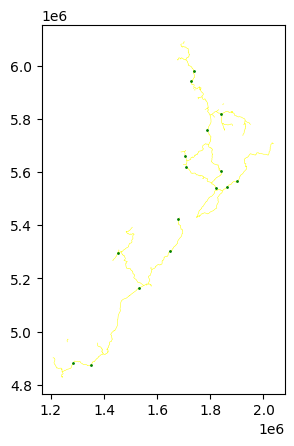

In [82]:
# Plot
base=railroad_2193All_bufDF.plot(color='yellow')
allRailroadsWithinBuffs.plot(ax=base, color='green', markersize=1)

In [83]:
# Con explore
base=railroad_2193All_bufDF.explore(color='yellow')
allRailroadsWithinBuffs.explore(m=base, color='green')